# Load Data

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url='https://docs.google.com/spreadsheets/d/e/2PACX-1vQN3Ksa9szQuO4G1-msXWAp17KtVHQCBnuEieu_auu1wSiBf3-krHusIx5VBMkihxj-KZLBosDIGEyR/pub?output=csv'
df=pd.read_csv(url)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22467 entries, 0 to 22466
Columns: 281 entries, RegionID to 2022-09-30
dtypes: float64(273), int64(2), object(6)
memory usage: 48.2+ MB


,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0
4,6915,4,San Antonio,city,TX,TX,"San Antonio-New Braunfels, TX",Bexar County,114794.0,114975.0,...,269323.0,274032.0,278464.0,284127.0,289739.0,294776.0,297727.0,298796.0,299124.0,298951.0


In [3]:
df.dtypes

RegionID        int64
SizeRank        int64
RegionName     object
RegionType     object
StateName      object
               ...   
2022-05-31    float64
2022-06-30    float64
2022-07-31    float64
2022-08-31    float64
2022-09-30    float64
Length: 281, dtype: object

## Filter out 4 largest cities

In [4]:
df1=df[df['SizeRank']<4].copy()
df1.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0


## Melt Data

In [5]:
df1.columns

Index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       'State', 'Metro', 'CountyName', '2000-01-31', '2000-02-29',
       ...
       '2021-12-31', '2022-01-31', '2022-02-28', '2022-03-31', '2022-04-30',
       '2022-05-31', '2022-06-30', '2022-07-31', '2022-08-31', '2022-09-30'],
      dtype='object', length=281)

In [6]:
melt=pd.melt(df1.drop(columns=['RegionID','SizeRank','RegionType','StateName','State','Metro']),
            id_vars=["CountyName",'RegionName'],var_name='Date')
melt

,CountyName,RegionName,Date,value
0,Queens County,New York,2000-01-31,253690.0
1,Los Angeles County,Los Angeles,2000-01-31,234181.0
2,Harris County,Houston,2000-01-31,109068.0
3,Cook County,Chicago,2000-01-31,166139.0
4,Queens County,New York,2000-02-29,255517.0
...,...,...,...,...
1087,Cook County,Chicago,2022-08-31,315587.0
1088,Queens County,New York,2022-09-30,781622.0
1089,Los Angeles County,Los Angeles,2022-09-30,966595.0
1090,Harris County,Houston,2022-09-30,272639.0


## Convert date column into datetime data type and set to index

In [7]:
melt['Date']=pd.to_datetime(melt['Date'],format='%Y-%m-%d')
melt=melt.set_index('Date')
melt.info()
melt.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1092 entries, 2000-01-31 to 2022-09-30
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CountyName  1092 non-null   object 
 1   RegionName  1092 non-null   object 
 2   value       1087 non-null   float64
dtypes: float64(1), object(2)
memory usage: 34.1+ KB


,CountyName,RegionName,value
Date,,,
2000-01-31,Queens County,New York,253690.0
2000-01-31,Los Angeles County,Los Angeles,234181.0
2000-01-31,Harris County,Houston,109068.0
2000-01-31,Cook County,Chicago,166139.0
2000-02-29,Queens County,New York,255517.0


In [8]:
melt.index

DatetimeIndex(['2000-01-31', '2000-01-31', '2000-01-31', '2000-01-31',
               '2000-02-29', '2000-02-29', '2000-02-29', '2000-02-29',
               '2000-03-31', '2000-03-31',
               ...
               '2022-07-31', '2022-07-31', '2022-08-31', '2022-08-31',
               '2022-08-31', '2022-08-31', '2022-09-30', '2022-09-30',
               '2022-09-30', '2022-09-30'],
              dtype='datetime64[ns]', name='Date', length=1092, freq=None)

## Group by and resample to months

In [9]:
melted=melt.groupby('RegionName').resample('M').mean()
melted

/var/folders/zd/1wqdzm7d7d13shmcygx_4src0000gn/T/ipykernel_1384/3973341150.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  melted=melt.groupby('RegionName').resample('M').mean()
/var/folders/zd/1wqdzm7d7d13shmcygx_4src0000gn/T/ipykernel_1384/3973341150.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  melted=melt.groupby('RegionName').resample('M').mean()
/var/folders/zd/1wqdzm7d7d13shmcygx_4src0000gn/T/ipykernel_1384/3973341150.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_

value
RegionName Date                
Chicago    2000-01-31  166139.0
           2000-02-29  166536.0
           2000-03-31  167368.0
           2000-04-30  168826.0
           2000-05-31  170499.0
...                         ...
New York   2022-05-31  768797.0
           2022-06-30  773944.0
           2022-07-31  777692.0
           2022-08-31  779960.0
           2022-09-30  781622.0

[1092 rows x 1 columns]

## Looking at index levels

In [10]:
melted.index.get_level_values(0)

Index(['Chicago', 'Chicago', 'Chicago', 'Chicago', 'Chicago', 'Chicago',
       'Chicago', 'Chicago', 'Chicago', 'Chicago',
       ...
       'New York', 'New York', 'New York', 'New York', 'New York', 'New York',
       'New York', 'New York', 'New York', 'New York'],
      dtype='object', name='RegionName', length=1092)

In [11]:
melted.index.get_level_values(1)

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-30',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-30', '2000-10-31',
               ...
               '2021-12-31', '2022-01-31', '2022-02-28', '2022-03-31',
               '2022-04-30', '2022-05-31', '2022-06-30', '2022-07-31',
               '2022-08-31', '2022-09-30'],
              dtype='datetime64[ns]', name='Date', length=1092, freq=None)

## Using pd.IndexSlice to pull out New York and [2018:]

In [12]:
melted.loc[pd.IndexSlice['New York','2018':],:].sample(10)

value
RegionName Date                
New York   2019-04-30  695824.0
           2019-03-31  695720.0
           2018-10-31  685588.0
           2018-09-30  683546.0
           2019-12-31  686650.0
           2021-08-31  724138.0
           2020-11-30  698929.0
           2022-03-31  756734.0
           2020-10-31  696260.0
           2022-02-28  750578.0

## Saving to a dataframe

In [13]:
mny=melted.loc[pd.IndexSlice['New York','2018':],:]
mny.head()

value
RegionName Date                
New York   2018-01-31  656700.0
           2018-02-28  661012.0
           2018-03-31  665672.0
           2018-04-30  669989.0
           2018-05-31  673514.0

In [14]:
mny.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 57 entries, ('New York', Timestamp('2018-01-31 00:00:00', freq='M')) to ('New York', Timestamp('2022-09-30 00:00:00', freq='M'))
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   57 non-null     float64
dtypes: float64(1)
memory usage: 11.2+ KB


## Checking for Null values

In [15]:
mny.isna().sum()

value    0
dtype: int64

In [16]:
mny_s=mny['value']

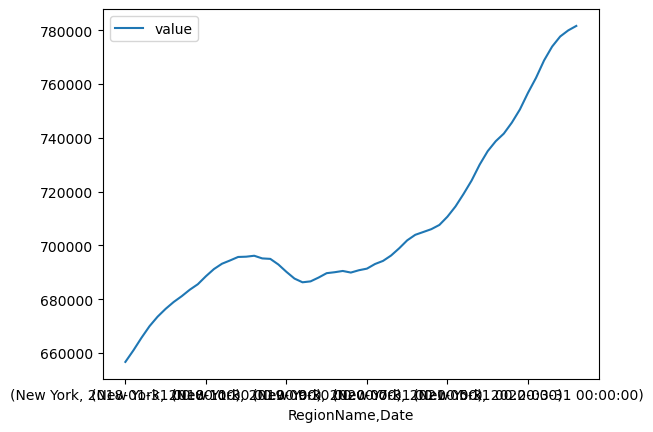

In [17]:
mny.plot();

In [18]:
import statsmodels.tsa.api as tsa
from pmdarima.model_selection import train_test_split
from pmdarima.arima.utils import ndiffs, nsdiffs

In [19]:
mny.columns

Index(['value'], dtype='object')

In [20]:
value=mny.iloc[2]
value

value    665672.0
Name: (New York, 2018-03-31 00:00:00), dtype: float64

In [21]:
melted.head()

value
RegionName Date                
Chicago    2000-01-31  166139.0
           2000-02-29  166536.0
           2000-03-31  167368.0
           2000-04-30  168826.0
           2000-05-31  170499.0

In [22]:
#mny.loc[pd.IndexSlice[:, 'value'],:]

In [23]:
mny['value']

RegionName  Date      
New York    2018-01-31    656700.0
            2018-02-28    661012.0
            2018-03-31    665672.0
            2018-04-30    669989.0
            2018-05-31    673514.0
            2018-06-30    676434.0
            2018-07-31    678984.0
            2018-08-31    681140.0
            2018-09-30    683546.0
            2018-10-31    685588.0
            2018-11-30    688553.0
            2018-12-31    691226.0
            2019-01-31    693208.0
            2019-02-28    694425.0
            2019-03-31    695720.0
            2019-04-30    695824.0
            2019-05-31    696173.0
            2019-06-30    695186.0
            2019-07-31    695010.0
            2019-08-31    692926.0
            2019-09-30    690189.0
            2019-10-31    687693.0
            2019-11-30    686304.0
            2019-12-31    686650.0
            2020-01-31    688073.0
            2020-02-29    689697.0
            2020-03-31    690055.0
            2020-04-30    690520

<Axes: xlabel='RegionName,Date'>

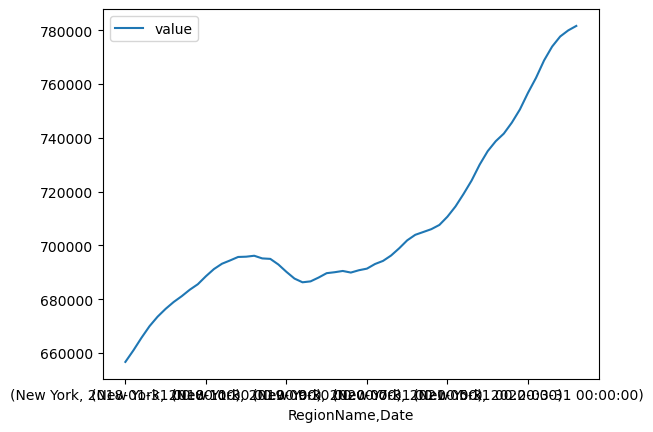

In [24]:
mny.plot()

In [25]:
mnyv=mny.unstack(level=0)
mnyv.head()

,value
RegionName,New York
Date,
2018-01-31,656700.0
2018-02-28,661012.0
2018-03-31,665672.0
2018-04-30,669989.0
2018-05-31,673514.0


In [26]:
mnyv.columns

MultiIndex([('value', 'New York')],
           names=[None, 'RegionName'])

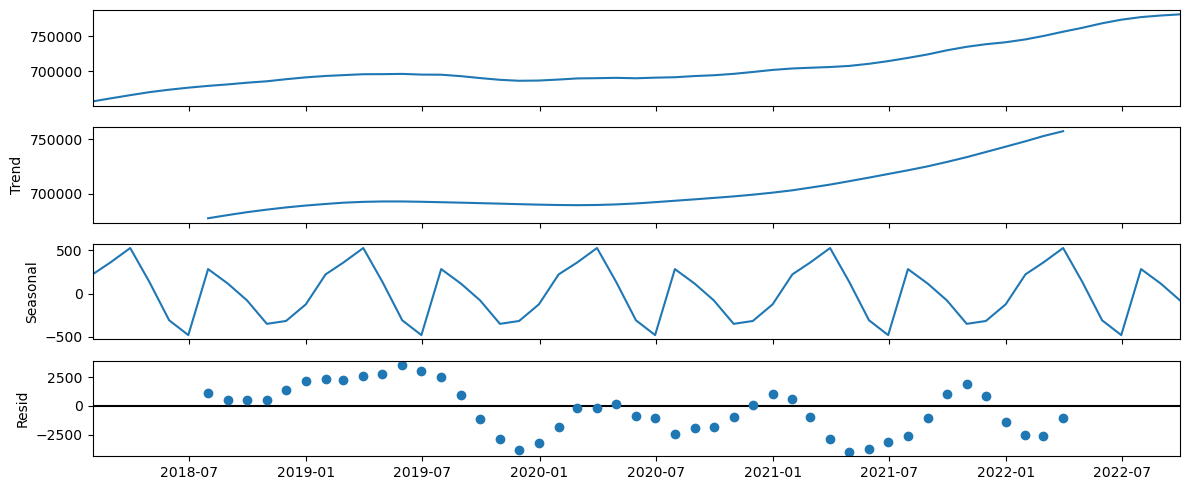

In [45]:
decomp_mny=tsa.seasonal_decompose(mnyv)
fig=decomp_mny.plot()
fig.set_size_inches(12,5)
fig.tight_layout()

In [28]:
sea_delta = decomp_mny.seasonal.max()-decomp_mny.seasonal.min()
print(f'The seasonal component is {sea_delta} which is ~{sea_delta/(mnyv.max()-mnyv.min())*100}% of the variation in time series.')
#sea_delta

The seasonal component is 1006.1319444443313 which is ~       RegionName
value  New York      0.805408
dtype: float64% of the variation in time series.


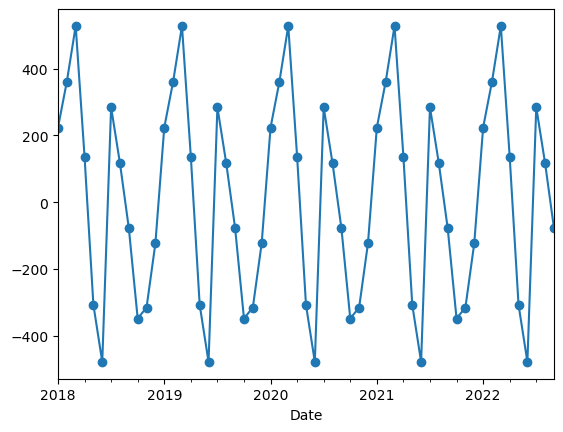

In [29]:
seasonal=decomp_mny.seasonal
ax=seasonal.plot(marker='o');

In [30]:
d=ndiffs(mnyv)
print(f'd={d}')

d=2


In [31]:
D=nsdiffs(mnyv,m=12)
print(f'D={D}')

D=0


In [32]:
mnyv_diff=mnyv.diff().diff().dropna()

In [52]:
def plot_acf_pacf(ts, nlags=40, figsize=(10, 5), 
                  annotate_sig=False, alpha=.05,
                 acf_kws={}, pacf_kws={},  
                  annotate_seas=False, m = None,
                 seas_color='black'):
    
    fig, axes = plt.subplots(nrows=2, figsize=figsize)

    
    # Sig lags line style
    sig_vline_kwargs = dict( ls=':', lw=1, zorder=0, color='red')

    # ACF
    tsa.graphics.plot_acf(ts, ax=axes[0], lags=nlags, **acf_kws)
    
    ## Annotating sig acf lags
    if annotate_sig == True:
        sig_acf_lags = get_sig_lags(ts,nlags=nlags,alpha=alpha, type='ACF')
        for lag in sig_acf_lags:
            axes[0].axvline(lag,label='sig', **sig_vline_kwargs )

    # PACF
    tsa.graphics.plot_pacf(ts,ax=axes[1], lags=nlags, **pacf_kws)
    
    ## Annotating sig pacf lags
    if annotate_sig == True:
        ## ANNOTATING SIG LAGS
        sig_pacf_lags = get_sig_lags(ts,nlags=nlags,alpha=alpha, type='PACF')
        for lag in sig_pacf_lags:
            axes[1].axvline(lag, label='sig', **sig_vline_kwargs)



    
    ### ANNOTATE SEASONS
    if annotate_seas == True:
        # Ensure m was defined
        if m is None:
            raise Exception("Must define value of m if annotate_seas=True.")

        ## Calculate number of complete seasons to annotate
        n_seasons = nlags//m 

        # Seasonal Lines style
        seas_vline_kwargs = dict( ls='--',lw=1, alpha=.7, color=seas_color, zorder=-1)
        
        ## for each season, add a line
        for i in range(1, n_seasons+1):
            axes[0].axvline(m*i, **seas_vline_kwargs, label="season")
            axes[1].axvline(m*i, **seas_vline_kwargs, label="season")

    fig.tight_layout()
    
    return fig



In [53]:
def plot_forecast(ts_train, ts_test, forecast_df, n_train_lags=None, 
                  figsize=(10,4), title='Comparing Forecast vs. True Data'):
    ### PLot training data, and forecast (with upper/,lower ci)
    fig, ax = plt.subplots(figsize=figsize)

    # setting the number of train lags to plot if not specified
    if n_train_lags==None:
        n_train_lags = len(ts_train)
            
    # Plotting Training  and test data
    ts_train.iloc[-n_train_lags:].plot(ax=ax, label="train")
    ts_test.plot(label="test", ax=ax)

    # Plot forecast
    forecast_df['mean'].plot(ax=ax, color='green', label="forecast")

    # Add the shaded confidence interval
    ax.fill_between(forecast_df.index, 
                    forecast_df['mean_ci_lower'],
                   forecast_df['mean_ci_upper'],
                   color='green', alpha=0.3,  lw=2)

    # set the title and add legend
    ax.set_title(title)
    ax.legend();
    
    return fig, ax



In [54]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

def regression_metrics_ts(ts_true, ts_pred, label="", verbose=True, output_dict=False,):
    # Get metrics
    mae = mean_absolute_error(ts_true, ts_pred)
    mse = mean_squared_error(ts_true, ts_pred)
    rmse = mean_squared_error(ts_true, ts_pred, squared=False)
    r_squared = r2_score(ts_true, ts_pred)
    mae_perc = mean_absolute_percentage_error(ts_true, ts_pred) * 100

    if verbose == True:
        # Print Result with label
        header = "---" * 20
        print(header, f"Regression Metrics: {label}", header, sep="\n")
        print(f"- MAE = {mae:,.3f}")
        print(f"- MSE = {mse:,.3f}")
        print(f"- RMSE = {rmse:,.3f}")
        print(f"- R^2 = {r_squared:,.3f}")
        print(f"- MAPE = {mae_perc:,.2f}%")

    if output_dict == True:
        metrics = {
            "Label": label,
            "MAE": mae,
            "MSE": mse,
            "RMSE": rmse,
            "R^2": r_squared,
            "MAPE(%)": mae_perc,
        }
        return metrics



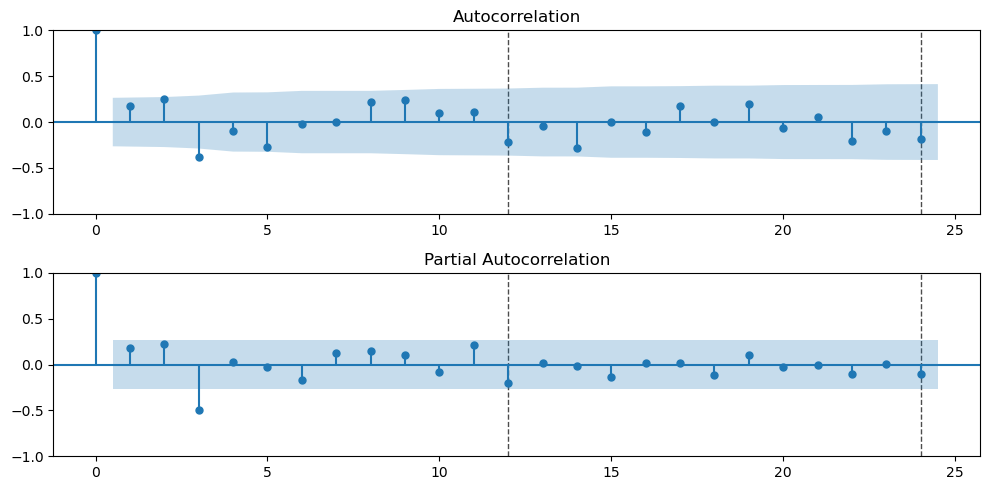

In [34]:
plot_acf_pacf(mnyv_diff, annotate_seas=True,m=12,nlags=24);

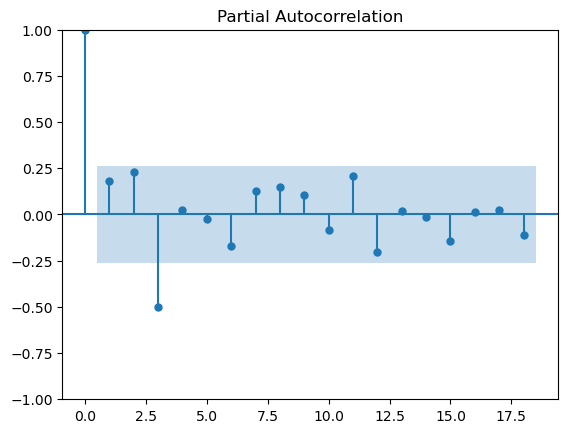

In [35]:
tsa.graphics.plot_pacf(mnyv_diff);

In [36]:
# Custom function for Ad Fuller Test
def get_adfuller_results(ts, alpha=.05, label='adfuller', **kwargs): #kwargs for adfuller()
    # Saving each output
    (test_stat, pval, nlags, nobs, crit_vals_d, 
    icbest ) = tsa.adfuller(ts, **kwargs)
    # Converting output to a dictionary with the interpretation of p
    adfuller_results = {'Test Statistic': test_stat,
                        "# of Lags Used":nlags, 
                       '# of Observations':nobs,
                        'p-value': round(pval,6),
                        'alpha': alpha,
                       'sig/stationary?': pval < alpha}
    return pd.DataFrame(adfuller_results, index =[label])



In [37]:
get_adfuller_results(mnyv_diff)

,Test Statistic,# of Lags Used,# of Observations,p-value,alpha,sig/stationary?
adfuller,-5.461615,2,52,0.000003,0.05,True


In [38]:
mny.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 57 entries, ('New York', Timestamp('2018-01-31 00:00:00', freq='M')) to ('New York', Timestamp('2022-09-30 00:00:00', freq='M'))
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   57 non-null     float64
dtypes: float64(1)
memory usage: 11.2+ KB


In [56]:
unstack=mny.unstack(level=0)
unstack

,value
RegionName,New York
Date,
2018-01-31,656700.0
2018-02-28,661012.0
2018-03-31,665672.0
2018-04-30,669989.0
2018-05-31,673514.0
2018-06-30,676434.0
2018-07-31,678984.0
2018-08-31,681140.0


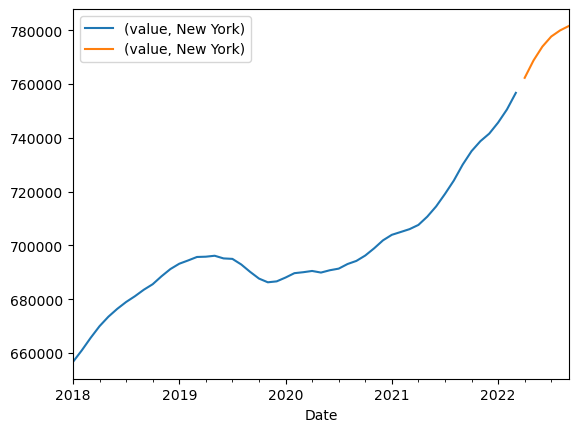

In [57]:
train, test = train_test_split(unstack,test_size=6)
ax=train.plot(label='Train')
test.plot(ax=ax,label='Test')
ax.legend();

In [40]:
train

value
RegionName Date                
New York   2018-01-31  656700.0
           2018-02-28  661012.0
           2018-03-31  665672.0
           2018-04-30  669989.0
           2018-05-31  673514.0
           2018-06-30  676434.0
           2018-07-31  678984.0
           2018-08-31  681140.0
           2018-09-30  683546.0
           2018-10-31  685588.0
           2018-11-30  688553.0
           2018-12-31  691226.0
           2019-01-31  693208.0
           2019-02-28  694425.0
           2019-03-31  695720.0
           2019-04-30  695824.0
           2019-05-31  696173.0
           2019-06-30  695186.0
           2019-07-31  695010.0
           2019-08-31  692926.0
           2019-09-30  690189.0
           2019-10-31  687693.0
           2019-11-30  686304.0
           2019-12-31  686650.0
           2020-01-31  688073.0
           2020-02-29  689697.0
           2020-03-31  690055.0
           2020-04-30  690520.0
           2020-05-31  689921.0
           2020-06-30  690785.0
           2020-07-31  691384.0
           2020-08-31  693097.0
           2020-09-30  694261.0
           2020-10-31  696260.0
           2020-11-30  698929.0
           2020-12-31  701899.0
           2021-01-31  703956.0
           2021-02-28  705003.0
           2021-03-31  706066.0
           2021-04-30  707633.0
           2021-05-31  710706.0
           2021-06-30  714507.0
           2021-07-31  719155.0
           2021-08-31  724138.0
           2021-09-30  730055.0
           2021-10-31  735069.0
           2021-11-30  738773.0
           2021-12-31  741586.0
           2022-01-31  745686.0
           2022-02-28  750578.0
           2022-03-31  756734.0

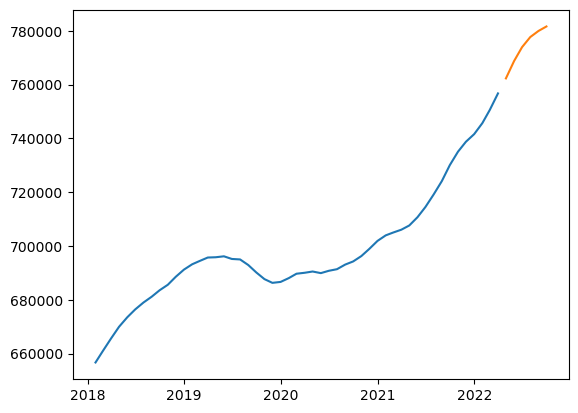

In [41]:
plt.plot(train['value'].unstack().T)
plt.plot(test['value'].unstack().T);

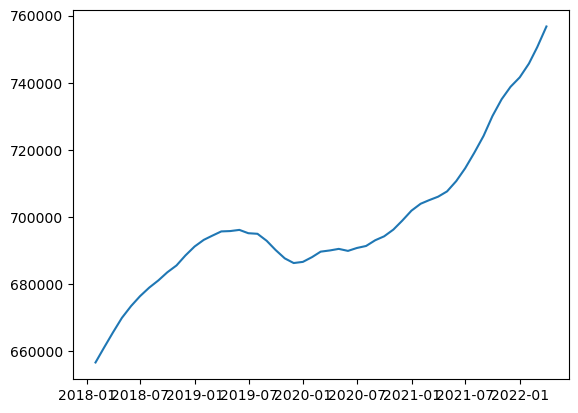

In [42]:
plt.plot(train['value'].unstack().T);

In [58]:
p=1
d=2
q=1
P=1
D=0
Q=1
m=12
sarima=tsa.ARIMA(train,order=(p,d,q),seasonal_order=(P,D,Q,m)).fit()

/opt/homebrew/Caskroom/miniforge/base/envs/dojo-env/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


------------------------------------------------------------
Regression Metrics: 
------------------------------------------------------------
- MAE = 4,205.928
- MSE = 36,065,007.497
- RMSE = 6,005.415
- R^2 = 0.201
- MAPE = 0.54%


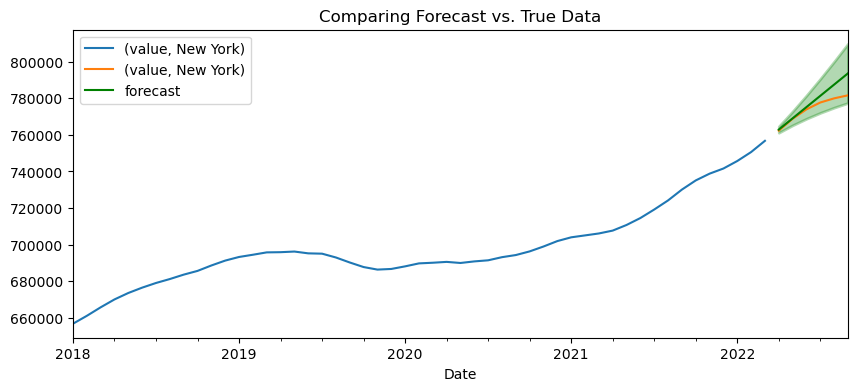

In [59]:
forecast_df=sarima.get_forecast(len(test)).summary_frame()
plot_forecast(train,test,forecast_df)
regression_metrics_ts(test,forecast_df['mean'])

In [60]:
sarima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                   value_New York   No. Observations:                   51
Model:             ARIMA(1, 2, 1)x(1, 0, 1, 12)   Log Likelihood                -401.677
Date:                          Thu, 26 Oct 2023   AIC                            813.353
Time:                                  22:02:29   BIC                            822.812
Sample:                              01-31-2018   HQIC                           816.942
                                   - 03-31-2022                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9240      0.177     -5.231      0.000      -1.270      -0.578
ma.L1          0.9230      0.178      5.171      0.000       0.573       1.273
ar.S.L12       0.9295      2.578      0.361      0.718      -4.123       5.982
ma.S.L12      -0.9287      2.582     -0.360      0.719      -5.990       4.132
sigma2      7.509e+05   3.64e-06   2.06e+11      0.000    7.51e+05    7.51e+05
===================================================================================
Ljung-Box (L1) (Q):                   1.60   Jarque-Bera (JB):                 1.79
Prob(Q):                              0.21   Prob(JB):                         0.41
Heteroskedasticity (H):               2.29   Skew:                            -0.04
Prob(H) (two-sided):                  0.11   Kurtosis:                         2.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.37e+28. Standard errors may be unstable.
"""

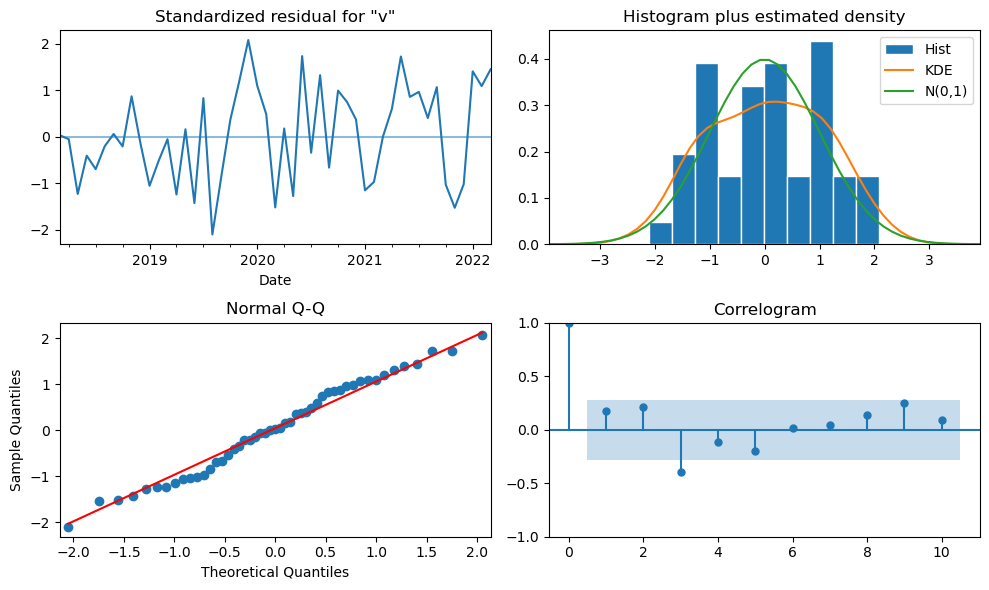

In [61]:
fig=sarima.plot_diagnostics()
fig.set_size_inches(10,6)
fig.tight_layout()

In [71]:
import pmdarima as pm

auto_model=pm.auto_arima(train,seasonal=True,m=12,trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=1040.349, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=909.717, Time=0.00 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=930.101, Time=0.06 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=912.587, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=940.569, Time=0.00 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=911.717, Time=0.01 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=911.717, Time=0.01 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=913.717, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=928.324, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=910.593, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=907.207, Time=0.04 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=909.209, Time=0.10 sec
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=1024.876, Time=0.04 sec
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=911.425, Time=0.11 sec
 ARIMA(2,1,1)(0,0,0)[12] interc

In [72]:
print(auto_model.order)
print(auto_model.seasonal_order)

(1, 1, 1)
(0, 0, 0, 12)


In [73]:
auto_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   51
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -449.603
Date:                Thu, 26 Oct 2023   AIC                            907.207
Time:                        22:16:18   BIC                            914.855
Sample:                    01-31-2018   HQIC                           910.119
                         - 03-31-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    593.8213   1281.383      0.463      0.643   -1917.644    3105.286
ar.L1          0.6749      0.693      0.974      0.330      -0.683       2.032
ma.L1         -0.6674      0.694     -0.962      0.336      -2.028       0.693
sigma2      3.622e+06      0.252   1.44e+07      0.000    3.62e+06    3.62e+06
===================================================================================
Ljung-Box (L1) (Q):                  37.34   Jarque-Bera (JB):                 0.01
Prob(Q):                              0.00   Prob(JB):                         0.99
Heteroskedasticity (H):               4.84   Skew:                            -0.01
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.57e+23. Standard errors may be unstable.
"""

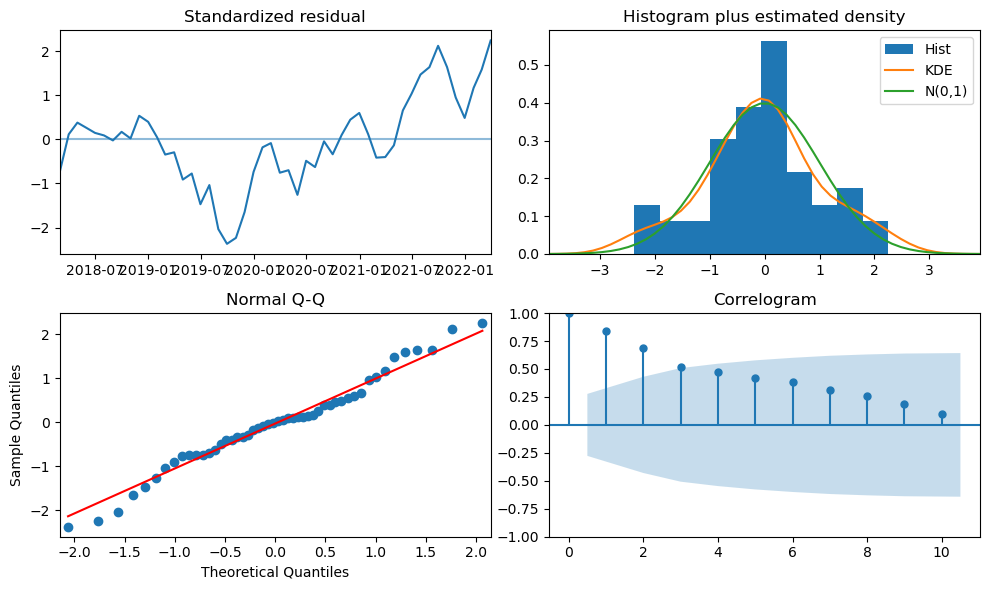

In [74]:
fig=auto_model.plot_diagnostics()
fig.set_size_inches(10,6)
fig.tight_layout()

In [75]:
auto_model=tsa.ARIMA(train,order=auto_model.order,seasonal_order=auto_model.seasonal_order).fit()

------------------------------------------------------------
Regression Metrics: 
------------------------------------------------------------
- MAE = 10,334.186
- MSE = 119,035,688.168
- RMSE = 10,910.348
- R^2 = -1.638
- MAPE = 1.33%


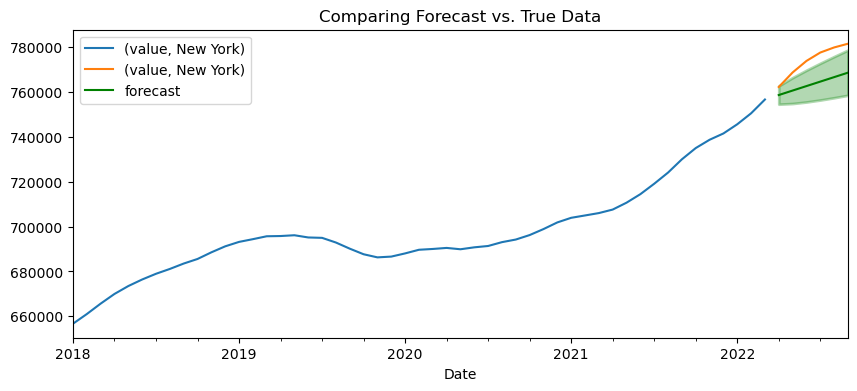

In [76]:
forecast_df=auto_model.get_forecast(steps=len(test)).summary_frame()
plot_forecast(train,test,forecast_df)
regression_metrics_ts(test,forecast_df['mean'])

In [80]:
p=1
d=2
q=1
P=1
D=0
Q=1
m=12
final_model=tsa.ARIMA(unstack,order=(p,d,q), seasonal_order=(P,D,Q,m)).fit()

In [81]:
len(test)

6

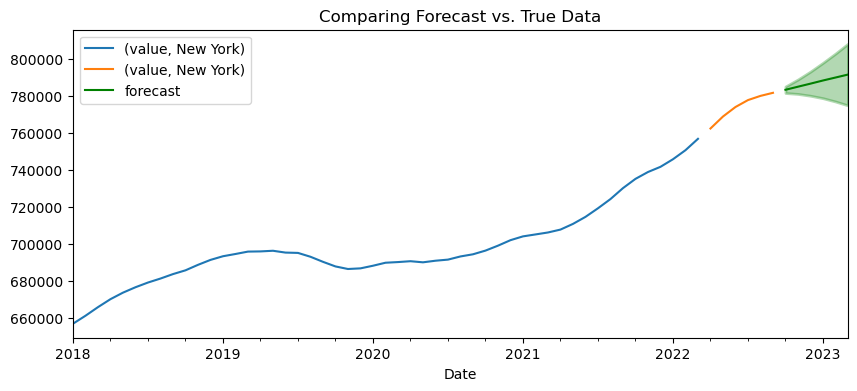

In [82]:
forecast_df=final_model.get_forecast(len(test)).summary_frame()
plot_forecast(train,test,forecast_df);

In [ ]:
fo